# Solution — UMAP

Compare two UMAP configurations:
- **A**: `n_neighbors=2`, `min_dist=1.0`
- **B**: `n_neighbors=10`, `min_dist=0.1`

We standardize features first for a fair comparison.


In [4]:
# 1. Load dataset
import pandas as pd

df = pd.read_csv("../data/day5_example.csv")

y = df['group']
X = df[['Gene1','Gene2','Gene3']]
X.head()


,Gene1,Gene2,Gene3
0,0.524097,-0.047710,-0.545653
1,-2.260768,-1.519615,-0.398969
2,-0.019680,0.794936,0.585381
3,0.183140,-0.144233,0.163862
4,-0.361351,-0.706498,0.141025


In [8]:
# 2. Fit UMAPs (after standardization)
from sklearn.preprocessing import StandardScaler
import umap

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

umap_a = umap.UMAP(n_neighbors=2, min_dist=1.0)
umap_b = umap.UMAP(n_neighbors=10, min_dist=0.1)

emb_a = umap_a.fit_transform(Xz)
emb_b = umap_b.fit_transform(Xz)

emb_a[:3], emb_b[:3]

(array([[18.999722 , -2.763465 ],
        [13.347232 , -3.2976232],
        [10.33786  ,  7.1608906]], dtype=float32),
 array([[15.9444065,  4.4165673],
        [13.949025 ,  4.5500684],
        [15.8509445,  2.6646087]], dtype=float32))

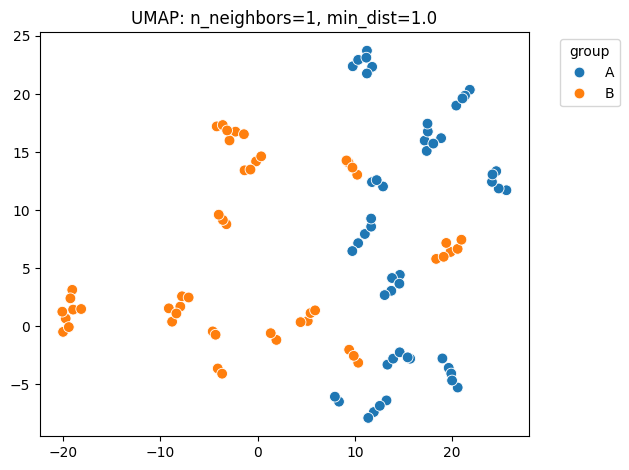

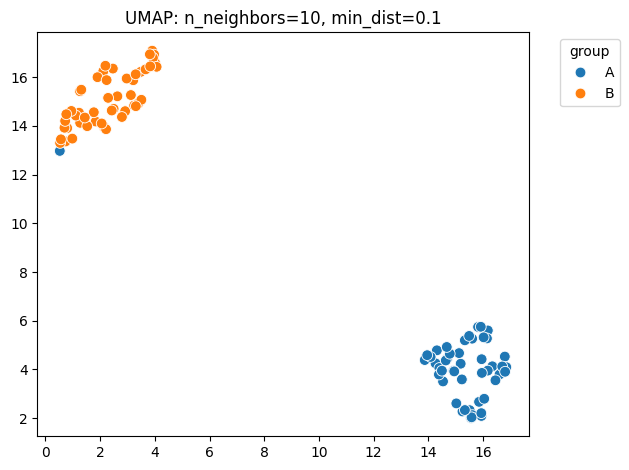

In [ ]:
# 3. Plot the embeddings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x=emb_a[:,0], y=emb_a[:,1], hue=y, s=60)
plt.title('UMAP: n_neighbors=2, min_dist=1.0')
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(x=emb_b[:,0], y=emb_b[:,1], hue=y, s=60)
plt.title('UMAP: n_neighbors=10, min_dist=0.1')
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Notes
- Very small neighborhoods (`n_neighbors=2`) + large `min_dist` spreads points could result in artificially fragmented groups.
- Larger neighborhoods (`n_neighbors=10`) + small `min_dist` tends to pack similar points more tightly.
- Use a fixed `random_state` for reproducible runs.
